<a href="https://colab.research.google.com/github/hanasgnt/PCVK_2024_14/blob/main/week11_14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Nama  : Hana Sugianto**

**NIM   : 2241720102**

**Kelas : TI 3E / 14**

Link github : https://github.com/hanasgnt/PCVK_2024_14/blob/main/week11_14.ipynb

#### **D. Latihan Praktikum 🕵🏻‍♂️**

##### **Import & akses drive**

In [1]:
# import library
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

In [3]:
# akses drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##### **Implementasikan 6 metode template matching pada openCV**

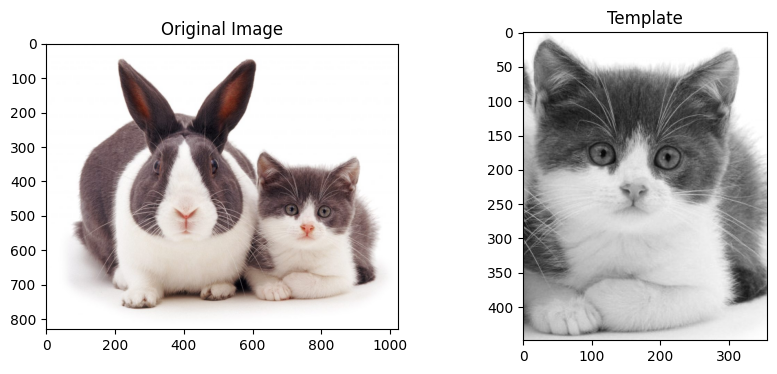

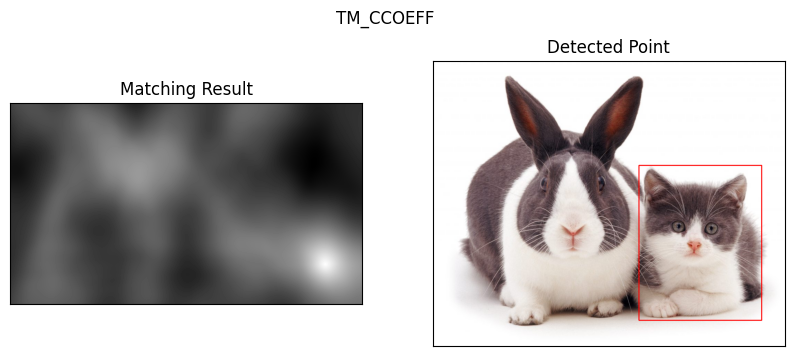

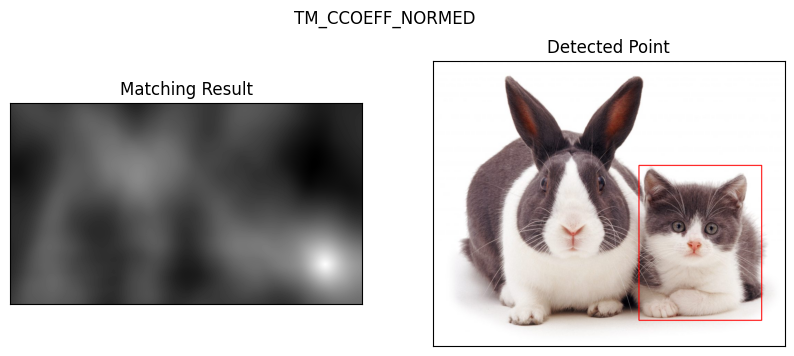

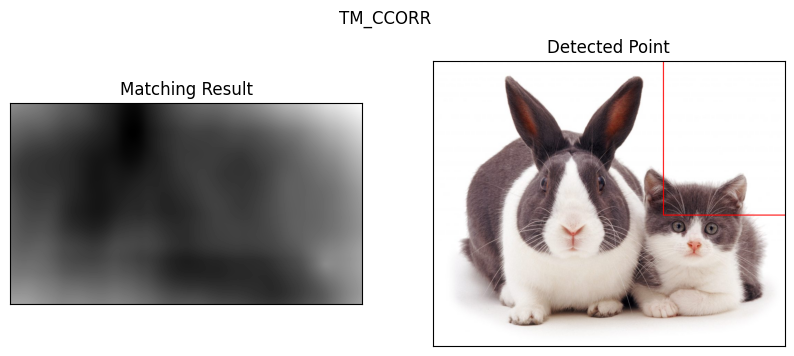

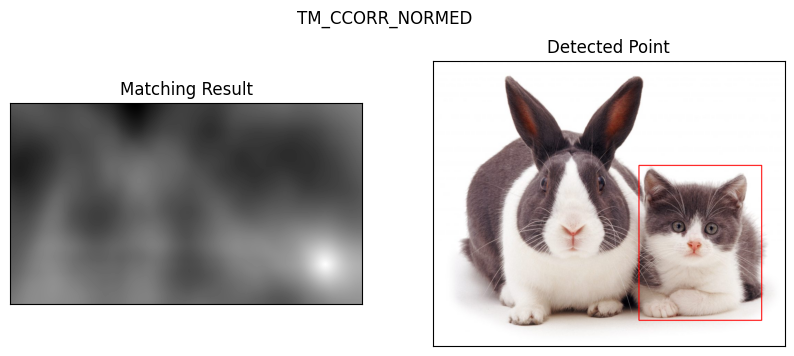

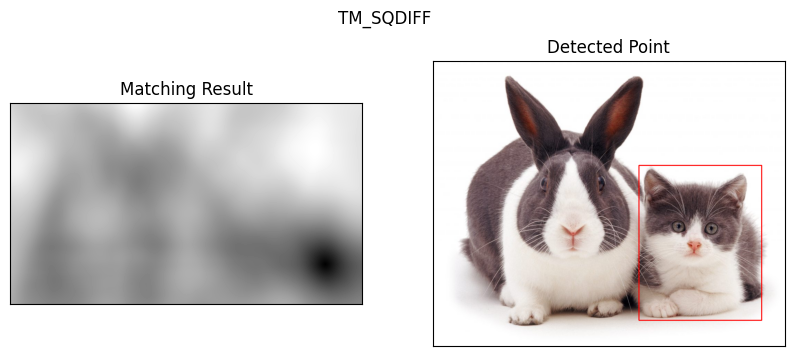

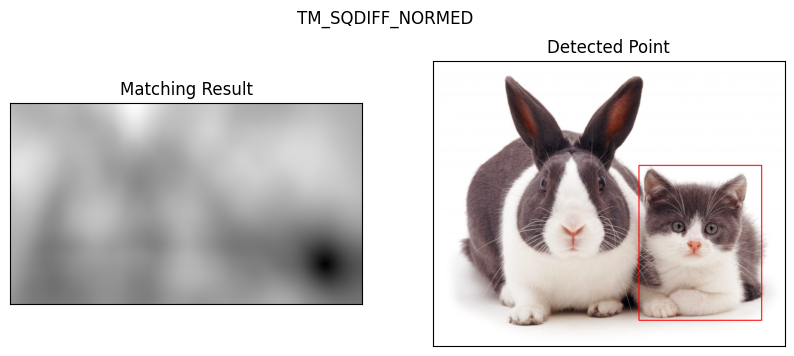

In [ ]:
path = '/content/drive/MyDrive/PCVK_2024/Object Detection/cats_and_bunnies.jpg'
path_template = '/content/drive/MyDrive/PCVK_2024/Object Detection/cat2_templatejpg.jpg'

img = cv.cvtColor(cv.imread(path, cv.IMREAD_COLOR), cv.COLOR_BGR2RGB)
assert img is not None, "file could not be read, check with os.path.exists()"

img2 = img.copy()
template = cv.imread(path_template, cv.IMREAD_GRAYSCALE)
assert template is not None, "file could not be read, check with os.path.exists()"

w, h = template.shape[::-1]

# Print photos
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1),plt.imshow(img,cmap = 'gray')
plt.title('Original Image')
plt.subplot(1, 2, 2),plt.imshow(template,cmap = 'gray')
plt.title('Template')
plt.show()

# All the 6 methods for comparison in a list
methods = ['TM_CCOEFF', 'TM_CCOEFF_NORMED', 'TM_CCORR',
            'TM_CCORR_NORMED', 'TM_SQDIFF', 'TM_SQDIFF_NORMED']

for meth in methods:
    img = img2.copy()
    method = getattr(cv, meth)

    # Apply template Matching
    res = cv.matchTemplate(cv.cvtColor(img, cv.COLOR_BGR2GRAY), template, method)
    min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)

    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    if method in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)

    cv.rectangle(img,top_left, bottom_right, 255, 2)

    plt.figure(figsize=(10, 4))
    plt.suptitle(meth)
    plt.subplot(1, 2, 1),plt.imshow(res,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(1, 2, 2),plt.imshow(img,cmap = 'gray')
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])

    plt.show()

##### **Implementasikan konsep template matching tanpa menggunakan library OpenCV untuk multiple object bold**

In [ ]:
!pip install Pillow
from PIL import Image, ImageDraw

In [ ]:
# Fungsi template matching
def template_matching(image, template, threshold=0.5, overlap_thresh=0.5):
  h_img, w_img = image.shape[:2]
  h_temp, w_temp = template.shape[:2]

  # Mencari kecocokan berdasarkan korelasi
  matches = [
      (x, y, np.corrcoef(image[y:y+h_temp, x:x+w_temp].flatten(), template.flatten())[0, 1])
      for y in range(h_img - h_temp + 1) for x in range(w_img - w_temp + 1)
      if np.corrcoef(image[y:y+h_temp, x:x+w_temp].flatten(), template.flatten())[0, 1] >= threshold
  ]

  # Mengurutkan kecocokan berdasarkan nilai korelasi tertinggi
  matches.sort(key=lambda x: x[2], reverse=True)

  # Melakukan filter terhadap nilai korelasi yang saling tumpang tindih
  final_matches, suppressed = [], [False] * len(matches)
  for i, (x1, y1, _) in enumerate(matches):
      if suppressed[i]:
          continue
      final_matches.append((x1, y1))
      for j, (x2, y2, _) in enumerate(matches[i+1:], start=i+1):
        if not suppressed[j]:
          # Menghitung area yang bertindihan
          overlap_x = max(0, min(x1 + w_temp, x2 + w_temp) - max(x1, x2))
          overlap_y = max(0, min(y1 + h_temp, y2 + h_temp) - max(y1, y2))
          overlap_area = overlap_x * overlap_y
          if overlap_area / float(2 * w_temp * h_temp - overlap_area) > overlap_thresh:
              suppressed[j] = True

  return final_matches

# Funtion gambar rectangle
def draw_matches(image, matches, template_size):
  img_pil = Image.fromarray(image)
  draw = ImageDraw.Draw(img_pil)
  for (x, y) in matches:
      draw.rectangle([x, y, x + template_size[1], y + template_size[0]], outline="yellow", width=2)
  return img_pil

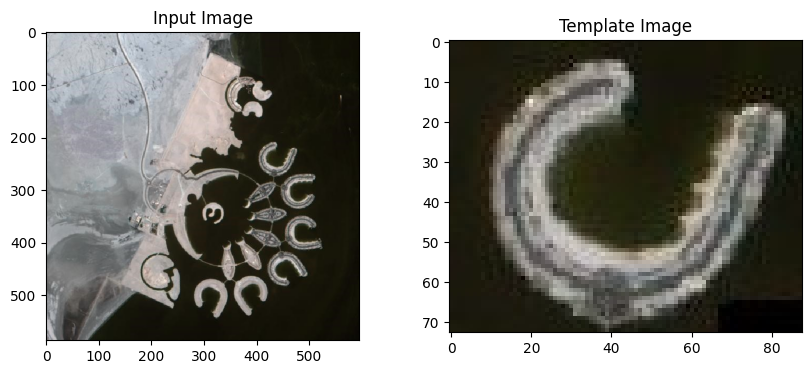

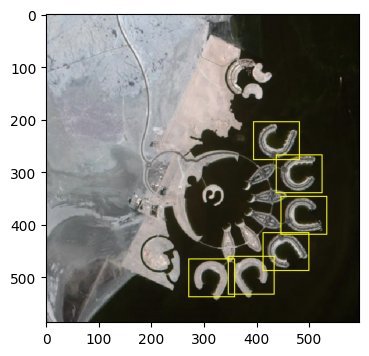

In [ ]:
img = cv.imread('/content/drive/MyDrive/PCVK_2024/Object Detection/bahrain.jpg')
template_img = cv.imread('/content/drive/MyDrive/PCVK_2024/Object Detection/bahrain-template.jpg')

matches = template_matching(img, template_img, threshold=0.45)
result_image = draw_matches(img, matches, template_img.shape[:2])

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1),plt.imshow(img,cmap = 'gray')
plt.title('Input Image')
plt.subplot(1, 2, 2),plt.imshow(template_img,cmap = 'gray')
plt.title('Template Image')

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1),plt.imshow(result_image,cmap = 'gray')
plt.show()

##### **Implementasikan metode Sobel Edge Detection, Canny Edge Detection, dan Laplacian Edge Detection pada OpenCV**

In [ ]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

img = cv.imread('/content/drive/MyDrive/PCVK_2024/Object Detection/car-park.jpg')
img = cv.cvtColor(img, cv.COLOR_RGB2BGR)
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# Sobel Edge Detection (deteksi tepi horizontal dan vertikal)
sobel_x = cv.Sobel(img_gray, cv.CV_64F, 1, 0, ksize=3)
sobel_y = cv.Sobel(img_gray, cv.CV_64F, 0, 1, ksize=3)
sobel_edge = cv.magnitude(sobel_x, sobel_y)

# Canny Edge Detection
canny_edge = cv.Canny(img_gray, 100, 200)

# Laplacian Edge Detection
laplacian_edge = cv.Laplacian(img_gray, cv.CV_64F)
laplacian_edge = cv.convertScaleAbs(laplacian_edge)

**Sobel Edge Detection**

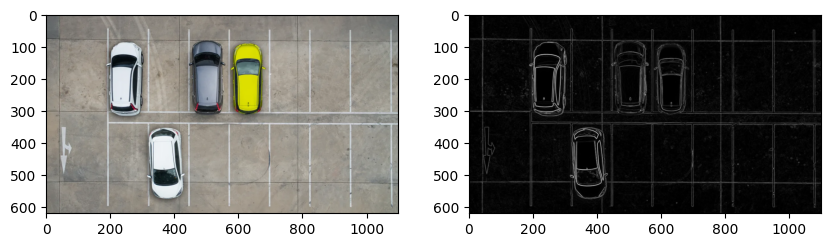

In [ ]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1),plt.imshow(img)
plt.subplot(1, 2, 2),plt.imshow(sobel_edge,cmap = 'gray')
plt.show()

**Canny Edge Detection**

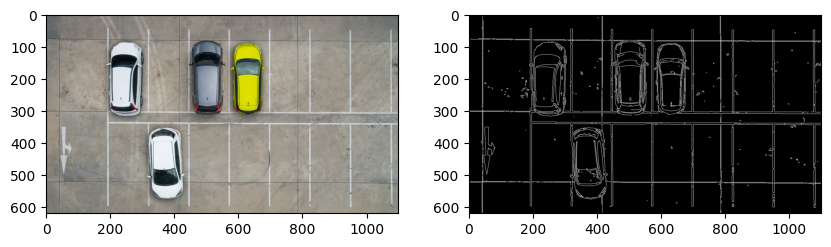

In [ ]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1),plt.imshow(img)
plt.subplot(1, 2, 2),plt.imshow(canny_edge,cmap = 'gray')
plt.show()

**Laplacian Edge Detection**

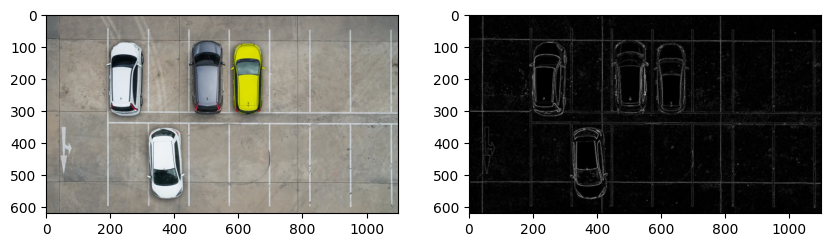

In [ ]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1),plt.imshow(img)
plt.subplot(1, 2, 2),plt.imshow(laplacian_edge,cmap = 'gray')
plt.show()

##### **Implementasikan metode Harris Corner Detection dan Shi-Tomasi Detection pada OpenCV dengan menggunakan gambar chess-board.jpg**

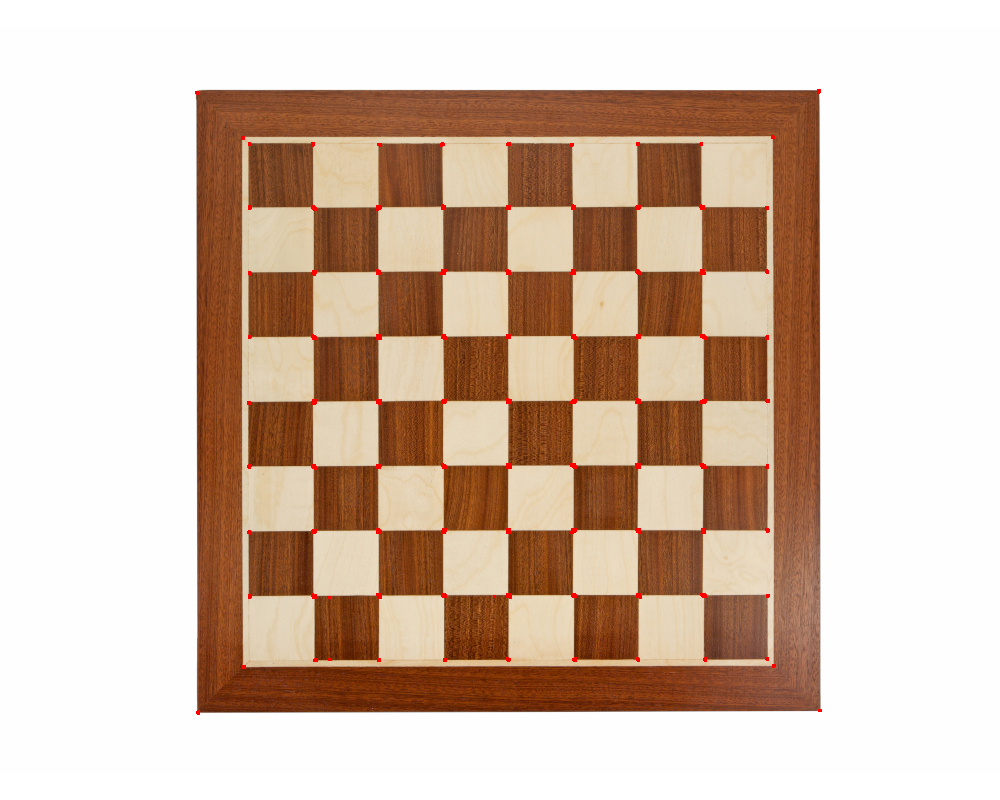

In [ ]:
from google.colab.patches import cv2_imshow

filename = '/content/drive/MyDrive/PCVK_2024/Object Detection/chess-board.jpg'
img = cv.imread(filename)
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)

gray = np.float32(gray)
dst = cv.cornerHarris(gray, 2, 3, 0.04)

#result is dilated for marking the corners, not important
dst = cv.dilate(dst, None)

# Threshold for an optimal value, it may vary depending on the image.
img[dst > 0.01 * dst.max()] = [0, 0, 255]
cv2_imshow(img)

<ipython-input-100-0e1ef85f0946>:6: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  corners = np.int0(corners)


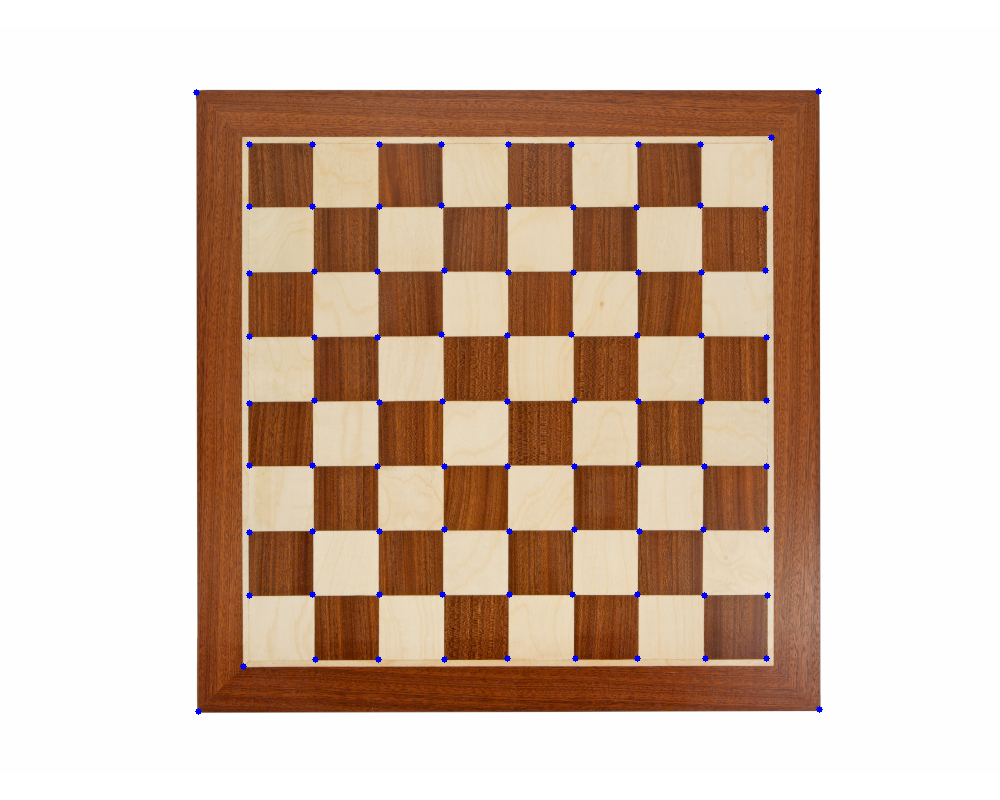

In [ ]:
img = cv.imread('/content/drive/MyDrive/PCVK_2024/Object Detection/chess-board.jpg')
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# Shi-Tomasi Corner Detection dengan parameter yang diubah untuk memaksimalkan deteksi sudut
corners = cv.goodFeaturesToTrack(gray, maxCorners=100, qualityLevel=0.1, minDistance=50)
corners = np.int0(corners)

# Menandai sudut yang terdeteksi pada gambar
for i in corners:
    x, y = i.ravel()
    cv.circle(img, (x, y), 3, (255, 0, 0), -1)

cv2_imshow(img)

##### **Implementasikan metode Hough Transform pada OpenCV dengan menggunakan gambar sudoku.jpg**

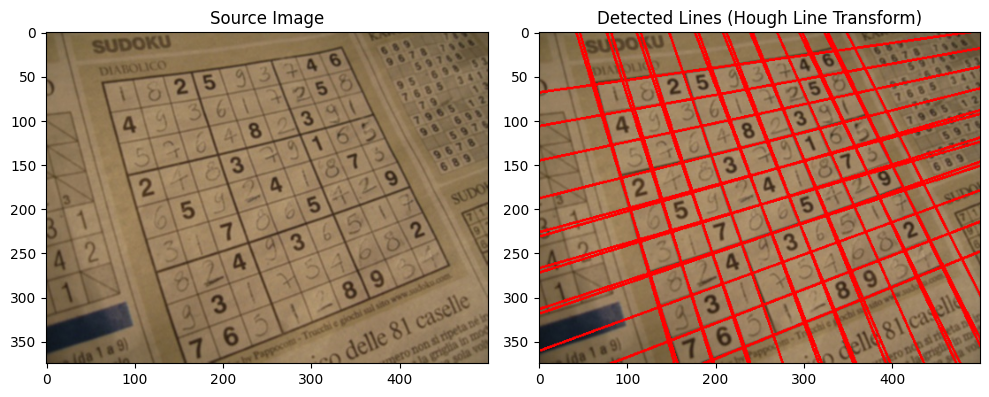

In [ ]:
# Read gambar
img = cv.imread('/content/drive/MyDrive/PCVK_2024/Object Detection/sudoku.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
img_draw = img.copy()

gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# Canny Edge Detection
edges = cv.Canny(gray, 50, 150)

# Dilasi Gambar
kernel = np.ones((3,3),np.uint16)
dilasi = cv.dilate(edges, kernel, iterations = 1)

# Erosi Gambar
kernel_e = np.ones((4,4),np.uint8)
erosion = cv.erode(dilasi, kernel_e, iterations = 1)

# HoughLines untuk mendeteksi garis
lines = cv.HoughLines(erosion, 1, np.pi / 180, threshold=230)

# Draw lines
if lines is not None:
    for line in lines:
        rho, theta = line[0]
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a * rho
        y0 = b * rho
        x1 = int(x0 + 1000 * (-b))
        y1 = int(y0 + 1000 * (a))
        x2 = int(x0 - 1000 * (-b))
        y2 = int(y0 - 1000 * (a))
        cv.line(img_draw, (x1, y1), (x2, y2), (255, 0, 0), 2)

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.title("Source Image")
plt.imshow(img)

plt.subplot(1, 2, 2)
plt.title("Detected Lines (Hough Line Transform)")
plt.imshow(img_draw)
plt.tight_layout()

##### **Implementasikan fungsi findContours() pada OpenCV untuk contour detection dengan menggunakan gambar laptop.jpg**

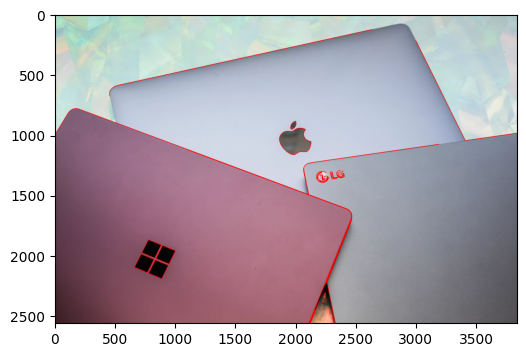

In [ ]:
img = cv.imread('/content/drive/MyDrive/PCVK_2024/Object Detection/laptop.jpg')
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# gaussian blur untuk mengurangi noise
img_blur = cv.GaussianBlur(img_gray, (3, 3), 0)

# menerapkan canny
edges = cv.Canny(img_blur, 100, 200)

# find contour
contours, hierarchy = cv.findContours(edges, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

# draw contour
img_countours = img.copy()
cv.drawContours(img_countours, contours, -1, (0, 0, 255), 3)

plt.figure(figsize=(10, 4))
plt.imshow(cv.cvtColor(img_countours, cv.COLOR_BGR2RGB))

#### **E. Pengayaan Materi KTP 💳**

In [6]:
import cv2
import os

In [ ]:
# Lokasi hasil pelat
path_plate = "/content/drive/MyDrive/PCVK_2024/Object Detection/KTP_More"
# Looping file di direktori
for name_file in sorted(os.listdir(path_plate)):
  src = cv2.imread(os.path.join(path_plate, name_file))
  blurred = src.copy()
  gray = blurred.copy()

**Penyesuaian dg ktp Maftuchin Tuban**

In [4]:
ktp_img = cv.imread('/content/drive/MyDrive/PCVK_2024/Object Detection/KTP_More/ktp3.png')

In [7]:
# Filtering
blurred = cv2.GaussianBlur(ktp_img, (5, 5), 0.5)

# Ubah ke grayscale
gray = cv2.cvtColor(blurred, cv2.COLOR_BGR2GRAY)
ret, bw = cv2.threshold(gray.copy(), 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

In [8]:
print(ret, bw.shape)

168.0 (300, 493)


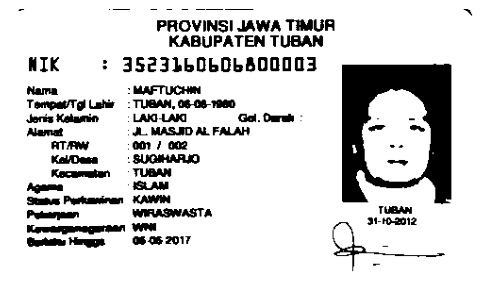

In [11]:
plt.figure(figsize=(6, 6))
plt.imshow(cv.cvtColor(bw, cv.COLOR_BGR2RGB)), plt.axis('off')
plt.show()

In [12]:
erode = cv2.erode(bw.copy(), cv2.getStructuringElement(cv2.MORPH_OPEN, (1, 1)))

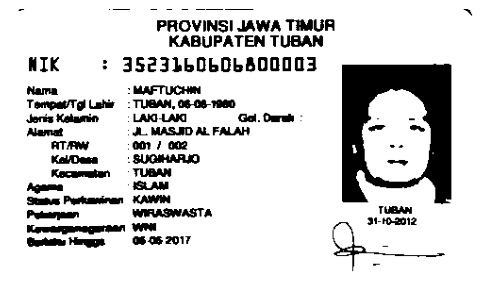

In [14]:
plt.figure(figsize=(6, 6))
plt.imshow(cv.cvtColor(erode, cv.COLOR_BGR2RGB)), plt.axis('off')
plt.show()

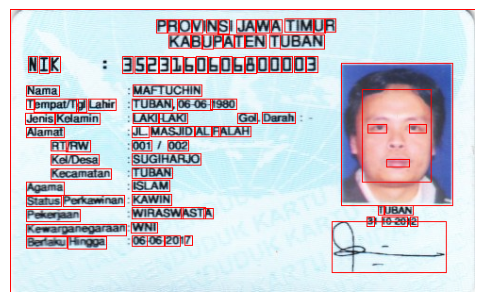

In [15]:
img_draw = ktp_img.copy()

# Ekstraksi kontur
contours, hierarchy = cv2.findContours(erode.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
# Looping contours untuk mendapatkan kontur yang sesuai
for cnt in contours:
  x, y, w, h = cv2.boundingRect(cnt)
  ras = format(w / h, '.2f')
  if h >= 40 and w >= 10 and float(ras) <= 1:
    cv.rectangle(img_draw, (x, y), (x + w, y + h), (0, 0, 255), thickness=1)
  elif h >= 8 and w >= 8 and float(ras) <= 10:
    cv.rectangle(img_draw, (x, y), (x + w, y + h), (0, 0, 255), thickness=1)
  elif h >= 10 and w >= 7 and float(ras) <= 8:
    cv.rectangle(img_draw, (x, y), (x + w, y + h), (0, 0, 255), thickness=1)

plt.figure(figsize=(6, 6))
plt.imshow(cv.cvtColor(img_draw, cv.COLOR_BGR2RGB)), plt.axis('off')
plt.show()

#### **F. Tugas Praktikum 🃏**

Setiap citra memiliki karakteristik yang berbeda. **Terapkan praktik pada materi pengayaan KTP** untuk setiap dataset KTP yang tersedia. **Perhatikan kondisi awal dataset**, **terapkan preprocessing** yang sesuai **jika kualitas visual citra kurang memadai** untuk segera diolah.

Pengerjaan dilakukan secara berkelompok dengan aturan sebagai berikut:

**Kelompok 3/9 – KTP Arief Wijaya Cimahi**


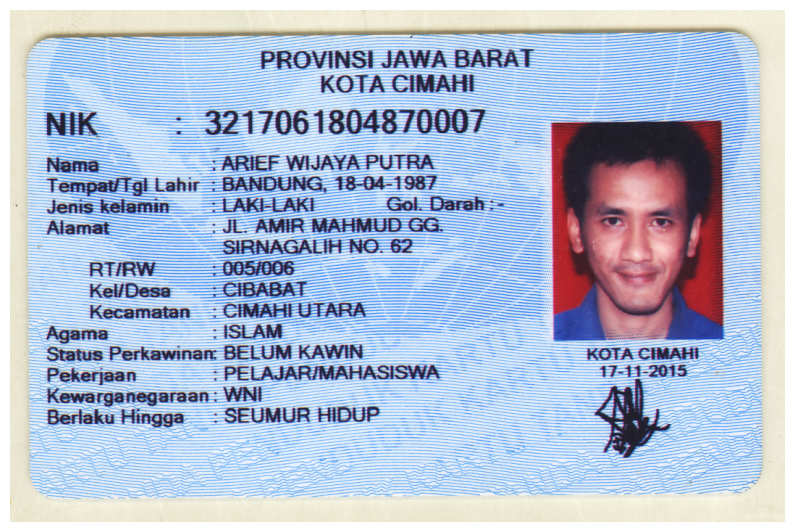

In [30]:
ktp_img = cv.imread('/content/drive/MyDrive/PCVK_2024/Object Detection/KTP_More/ktp2.png')

plt.figure(figsize=(10, 10))
plt.imshow(cv.cvtColor(ktp_img, cv.COLOR_BGR2RGB)), plt.axis('off')
plt.show()

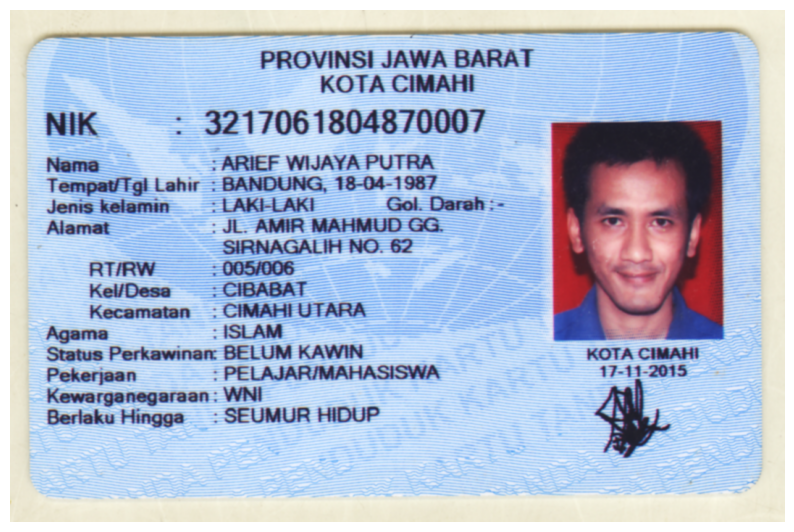

In [39]:
# Filtering
blurred = cv2.GaussianBlur(ktp_img, (5, 5), 0.9)

plt.figure(figsize=(10, 10))
plt.imshow(cv.cvtColor(blurred, cv.COLOR_BGR2RGB)), plt.axis('off')
plt.show()

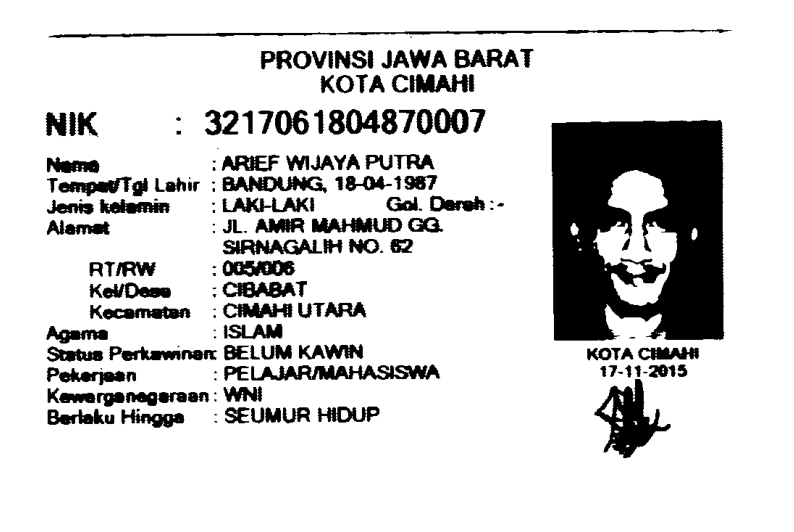

In [40]:
# Ubah ke grayscale
gray = cv2.cvtColor(blurred, cv2.COLOR_BGR2GRAY)
ret, bw = cv2.threshold(gray.copy(), 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

plt.figure(figsize=(10, 10))
plt.imshow(cv.cvtColor(bw, cv.COLOR_BGR2RGB)), plt.axis('off')
plt.show()

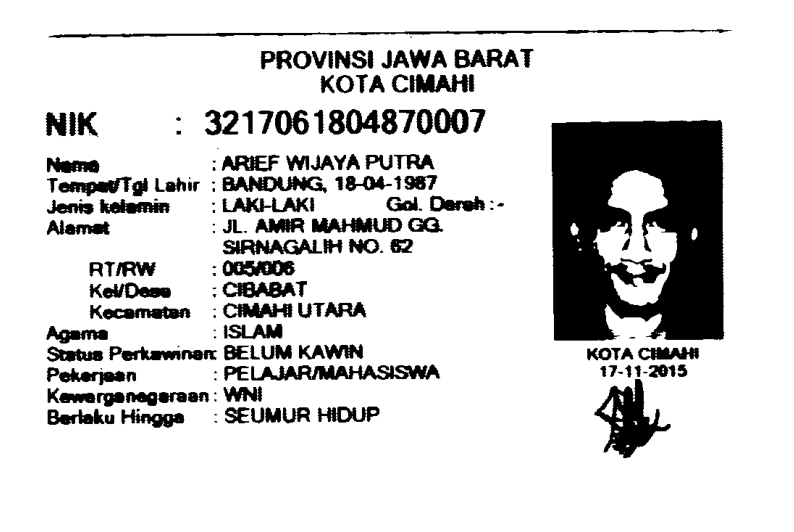

In [44]:
erode = cv2.erode(bw.copy(), cv2.getStructuringElement(cv2.MORPH_OPEN, (1, 1)))

plt.figure(figsize=(10, 10))
plt.imshow(cv.cvtColor(erode, cv.COLOR_BGR2RGB)), plt.axis('off')
plt.show()

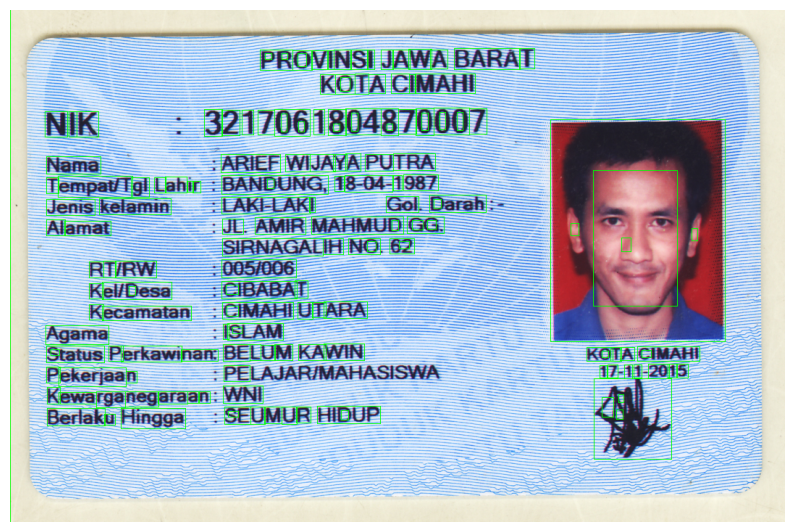

In [45]:
img_draw = ktp_img.copy()

# Ekstraksi kontur
contours, hierarchy = cv2.findContours(erode.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
# Looping contours untuk mendapatkan kontur yang sesuai
for cnt in contours:
  x, y, w, h = cv2.boundingRect(cnt)
  ras = format(w / h, '.2f')
  if h >= 40 and w >= 10 and float(ras) <= 1:
    cv.rectangle(img_draw, (x, y), (x + w, y + h), (0, 255, 0), thickness=1)
  elif h >= 8 and w >= 8 and float(ras) <= 10:
    cv.rectangle(img_draw, (x, y), (x + w, y + h), (0, 255, 0), thickness=1)
  elif h >= 10 and w >= 7 and float(ras) <= 8:
    cv.rectangle(img_draw, (x, y), (x + w, y + h), (0, 255, 0), thickness=1)

plt.figure(figsize=(10, 10))
plt.imshow(cv.cvtColor(img_draw, cv.COLOR_BGR2RGB)), plt.axis('off')
plt.show()